<h1 style="text-align:center"><span style="color:#111"><span style="font-size:48px"><span style="font-family:Comic Sans MS,cursive"><strong>The Apriori Algorithm</strong></span></span></span></h1>

The Apriori algorithm is a classic algorithm used to mine frequent itemsets in a dataset. The algorithm works by generating candidate itemsets of increasing size, and pruning those that do not meet a minimum support threshold. The algorithm uses a level-wise approach, where it first generates all frequent itemsets of size 1, then uses those to generate frequent itemsets of size 2, and so on.


#### Working of the Apriori Algorithm

The Apriori algorithm works in the following way:

1 Generate frequent itemsets of size 1 by scanning the database and counting the support of each item.

2 Repeat until no new frequent itemsets can be generated:<br>
  &emsp; a. Generate candidate itemsets by joining frequent itemsets of the previous level.<br>
  &emsp;  b. Prune candidate itemsets that do not meet the minimum support threshold.<br>
  &emsp;  c. Count the support of each candidate itemset.<br>

3 Generate association rules from the frequent itemsets.


### Basic concepts of Apriori algorithm



`Support`: It refers to the frequency of occurrence of an itemset in a dataset. It is calculated as the number of transactions containing the itemset divided by the total number of transactions.

$\text{support}(X) = \frac{\text{number of transactions containing }X}{\text{total number of transactions}}$.

`Confidence`: It measures how often the rule is found to be true. It is calculated as the number of transactions containing both the antecedent and consequent divided by the number of transactions containing only the antecedent.<br><br>
$\text{confidence}(X \rightarrow Y) = \frac{\text{support}(X \cup Y)}{\text{support}(X)}$.<br><br>

`Lift`: It measures the strength of the association between the antecedent and the consequent. A lift value greater than 1 indicates that the antecedent and consequent are positively correlated, while a value less than 1 indicates a negative correlation.<br>


$\text{lift}(X \rightarrow Y) = \frac{\text{support}(X \cup Y)}{\text{support}(X) \times \text{support}(Y)}$.<br><br>
`Frequent itemsets`: Itemsets that occur frequently in the dataset above a minimum support threshold.

`Association rules`: Rules that express a relationship between two itemsets, where the presence of one itemset implies the presence of the other. They consist of an antecedent (if) and a consequent (then) part.



### Import required libraries

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

### Define the transactions

In [ ]:
transactions = [['apple', 'bread', 'milk'],
                ['apple', 'bread', 'butter', 'eggs'],
                ['apple', 'banana', 'milk'],
                ['bread', 'milk', 'eggs'],
                ['bread', 'butter', 'eggs']]

### Convert transactions to a one-hot encoded boolean array

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

### Convert the array to a pandas DataFrame

In [6]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,apple,banana,bread,butter,eggs,milk
0,True,False,True,False,False,True
1,True,False,True,True,True,False
2,True,True,False,False,False,True
3,False,False,True,False,True,True
4,False,False,True,True,True,False


### Find frequent itemsets with minimum support of 0.5

In [7]:
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

### Generate association rules with minimum confidence of 0.7

In [ ]:
association_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

### Print frequent itemsets and association rules

In [9]:
frequent_itemsets

,support,itemsets
0,0.6,(apple)
1,0.8,(bread)
2,0.6,(eggs)
3,0.6,(milk)
4,0.6,"(bread, eggs)"


In [4]:
association_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bread),(eggs),0.8,0.6,0.6,0.75,1.25,0.12,1.6
1,(eggs),(bread),0.6,0.8,0.6,1.00,1.25,0.12,inf


### Plot frequent itemsets

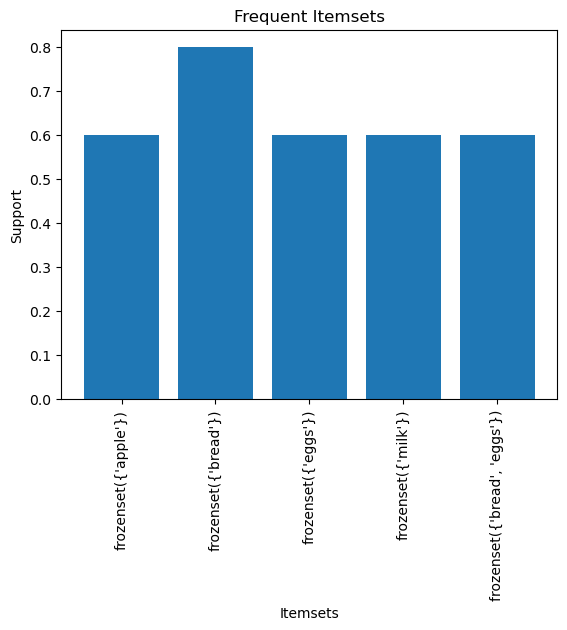

In [12]:
import matplotlib.pyplot as plt

plt.bar(range(len(frequent_itemsets)), frequent_itemsets['support'])
plt.xticks(range(len(frequent_itemsets)), frequent_itemsets['itemsets'], rotation=90)
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Frequent Itemsets')
plt.show()